<a href="https://colab.research.google.com/github/arrysoni/Angular_aarya/blob/main/Parkinsons_AI_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research : Early detection of the Parkinson's Disease**

**Research Under Dr. Mahfuza Farooque**

**Research Students:**\
Aarya Soni\
Apoorv Thite

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


# **Step 1: Understanding the data and the Dataset**

Here, we've read our dataset, which is Parkinsons.csv and diplayed the first few results of the dataset, showing the various attributes, their types and values.

In [ ]:
parkinsons = pd.read_csv("parkinsons.csv")

parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# Display the dataset information
print(parkinsons.info())

# Check for missing values
print(parkinsons.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
parkinsons.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# Dropping The Name Column
parkinsons1 = parkinsons.drop(['name'], axis=1, inplace=True)

# **Step 2 : Exploratory Data Analysis (EDA)**

<Axes: xlabel='status', ylabel='count'>

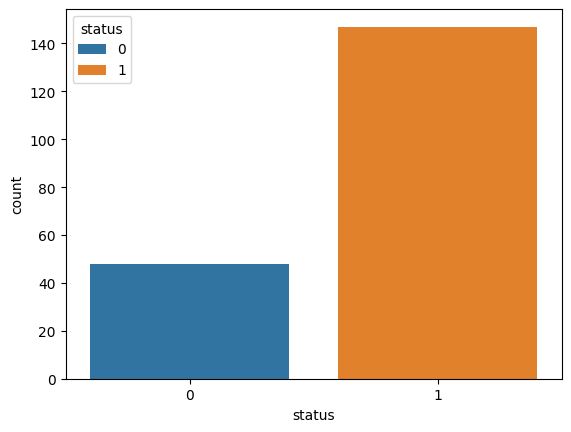

In [ ]:
#Balance of Data
sns.countplot(x='status',data=parkinsons, hue = 'status')

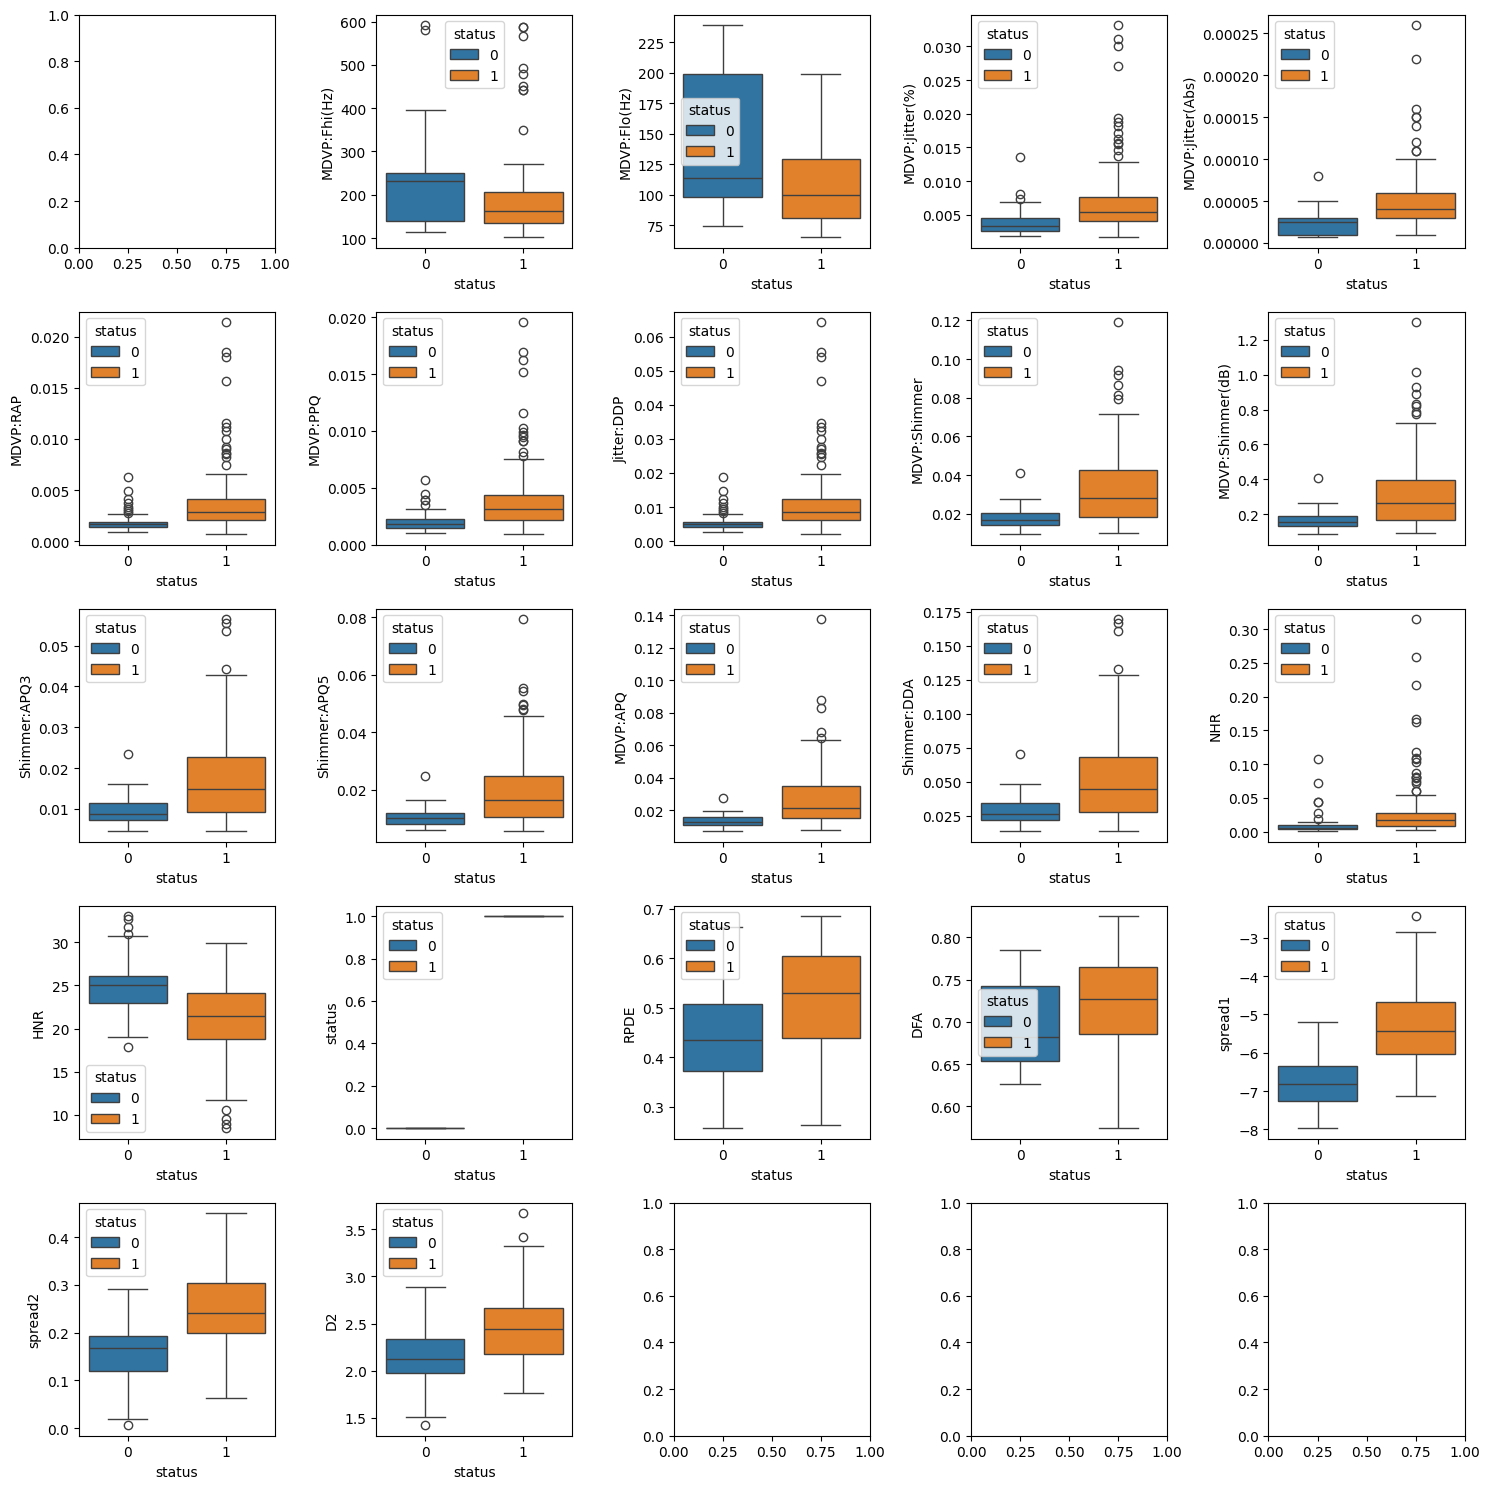

In [ ]:
#Box Plot
fig,axes = plt.subplots(5,5,figsize=(15,15))
axes = axes.flatten()


for i in range(1,len(parkinsons.columns)-1):
    sns.boxplot(x='status',y=parkinsons.iloc[:,i],data=parkinsons,orient='v',ax=axes[i], hue = 'status')
plt.tight_layout()
plt.show()

From the boxplot shown above it is very evident that if a patient has a lower rate of 'HNR', 'MDVP:Flo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Fo(Hz)' ,then he/she is affected by parkinsons disease.

HNR : Harmonics to Noise Ratio \
MDVP : Multidimensional Voice Program Analysis \
• Fo(Hz) - Average vocal fundamental frequency (Numerical variables) i.e Mean Pitch\
• Fhi(Hz) - Maximum vocal fundamental frequency (Numerical variables) i.e Highest
Pitch\
• Flo(Hz) - Minimum vocal fundamental frequency (Numerical variables) i.e Lowest
Pitch

# **Step 3: Data Preprocessing**

Here, we have performed essential preprocessing steps for the Parkinson's dataset to prepare it for machine learning model training. We begin by importing the necessary libraries for scaling and data splitting.
The dataset is then divided into features (X) and the target variable (y), with non-numerical and target columns (name and status) removed from the features.

Using StandardScaler, the features were standardized to have a mean of 0 and a standard deviation of 1, ensuring uniform contribution to the model. Finally, the standardized data is split into training and testing sets with an 80-20 ratio, allowing the model to be trained on one portion and evaluated on the other, ensuring reliable performance metrics.









In [ ]:
# 3.1

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exploring Imabalance In Dataset
parkinsons['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

This step will return the number of times each of these values appears in the dataset. This helps in understanding if one class is significantly more frequent than the other, which might require techniques such as resampling, stratified sampling, or using specific algorithms that handle class imbalance well.

In [ ]:
# 3.2

# Extracting Features Into Features & Target
X = parkinsons.drop(['status'], axis=1)
y = parkinsons['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


Splitting the dataset into two parts


*   Feature Set (X) : It contains all the columns of the dataset except the status column. This is done in order to build our prediction, without considering the actual output of the result.
*   Target Set (y) : It contains only the dropped 'Status' column and is used to check if our prediction matches the actual output.



In [ ]:
# 3.3

# Intialising SMOTE Object
sm = SMOTE(random_state=300)

# Resampling Data
X, y = sm.fit_resample(X, y)

print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)



*   From step 3.1, we understood that there is a substantial class imbalance in the dataset, where Class 1 has more than thrice the Class 0.
*   In this step, we address that class imbalance by using a data balancing technique called SMOTE (Synthetic Minority Over-sampling Technique). It generates synthetic samples for the minority class by interpolating between existing samples.\
*   Applying SMOTE to the feature and target sets balances the dataset by increasing the number of samples in the minority class.

We redefine X and y by considering this class balance and the resulting shape is taken into consideration.



In [ ]:
# Scaling features between -1 and 1  for normalization
scaler = MinMaxScaler((-1,1))

In [ ]:
# define X_features , Y_labels
X_features = scaler.fit_transform(X)
Y_labels = y

# splitting the dataset into traning and testing sets into 80 - 20
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

This code snippet is used to normalize the feature set so that all features fall within the range of -1 and 1. This normalization step can improve the performance of machine learning algorithms, especially those that are sensitive to the scale of the input data.

In our case, each feature will be scaled to fall within the range of -1 to 1.

* X_features: The scaled feature set.
* Y_labels: The target set.
* test_size=0.20: Specifies that 20% of the dataset should be used as the testing set, while the remaining 80% will be used for training.
* random_state=20: This ensures reproducibility by setting a seed for the random number generator. Using the same seed will always produce the same train-test split.

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

DTclassify = DecisionTreeClassifier()
DTclassify.fit(X_train, y_train)
predDT = DTclassify.predict(X_test)

basicreportDT = classification_report(y_test, predDT)
reportDT = classification_report(y_test, predDT, output_dict=True)
print(basicreportDT)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.86      0.96      0.91        26

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59



Here, we build a decision tree to make predictions based on the input features. The trained classifier makes predictions on the testing data.

Overall, the model achieved an accuracy of 0.93 on the test set. The macro average F1-score was 0.93, reflecting the balanced performance across both classes, while the weighted average F1-score was 0.92, taking into account the support (number of instances) for each class. These results suggest that the Decision Tree Classifier is effective in distinguishing between individuals with and without Parkinson's Disease, with slightly better performance in identifying those without the disease.

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predRF = rf.predict(X_test)

basicreportRF = classification_report(y_test, predRF)
reportRF = classification_report(y_test, predRF, output_dict=True)
print(basicreportRF)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.88      0.92        26

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



The technique we used here is Random Forest Classifier, it uses an ensemble of decision trees to improve classification accuracy. It aggregates the results of multiple trees to make more robust predictions.

The Random Forest Classifier demonstrates high accuracy in classifying both classes. It shows balanced performance with high precision and recall for both classes, indicating that it effectively distinguishes between individuals with and without Parkinson's Disease. The F1-scores for both classes are also high, highlighting the model's robustness in handling both positive and negative cases accurately.

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)

basicreportLR = classification_report(y_test, predlog)
reportLR = classification_report(y_test, predlog, output_dict=True)
print(basicreportLR)

print("Confusion Matrix:")
confusion_matrix(y_test, predlog)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.90      0.69      0.78        26

    accuracy                           0.83        59
   macro avg       0.85      0.82      0.82        59
weighted avg       0.84      0.83      0.83        59

Confusion Matrix:


array([[31,  2],
       [ 8, 18]])

This technique, which is Logistical Regression is used for binary classification tasks. It models the probability that a given input belongs to a particular class.

The Confusion Matrix, is a function that computes a matrix which provides a summary of prediction results on the test set. The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions.

The Logistic Regression model demonstrates an overall accuracy of 83% in classifying the test set. For class 0 (No Parkinson's Disease), the model achieved a precision of 0.79 and a high recall of 0.94, resulting in an F1-score of 0.86. This indicates that while the model is slightly less precise, it effectively identifies most instances of class 0. For class 1 (Parkinson's Disease), the model shows a higher precision of 0.90 but a lower recall of 0.69, leading to an F1-score of 0.78. This suggests that the model is good at correctly predicting class 1 when it does so but misses some actual cases of class 1. The macro average and weighted average F1-scores are both around 0.82-0.83, indicating balanced performance across classes. The confusion matrix reveals that the model correctly predicted 31 out of 33 instances for class 0 and 18 out of 26 instances for class 1, with some misclassifications primarily in predicting class 1.

In [ ]:
# Extracting metrics
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']

precision_0 = [reportDT['0']['precision'], reportRF['0']['precision'], reportLR['0']['precision']]
recall_0 = [reportDT['0']['recall'], reportRF['0']['recall'], reportLR['0']['recall']]
f1_score_0 = [reportDT['0']['f1-score'], reportRF['0']['f1-score'], reportLR['0']['f1-score']]

precision_1 = [reportDT['1']['precision'], reportRF['1']['precision'], reportLR['1']['precision']]
recall_1 = [reportDT['1']['recall'], reportRF['1']['recall'], reportLR['1']['recall']]
f1_score_1 = [reportDT['1']['f1-score'], reportRF['1']['f1-score'], reportLR['1']['f1-score']]

accuracy = [reportDT['accuracy'], reportRF['accuracy'], reportLR['accuracy']]

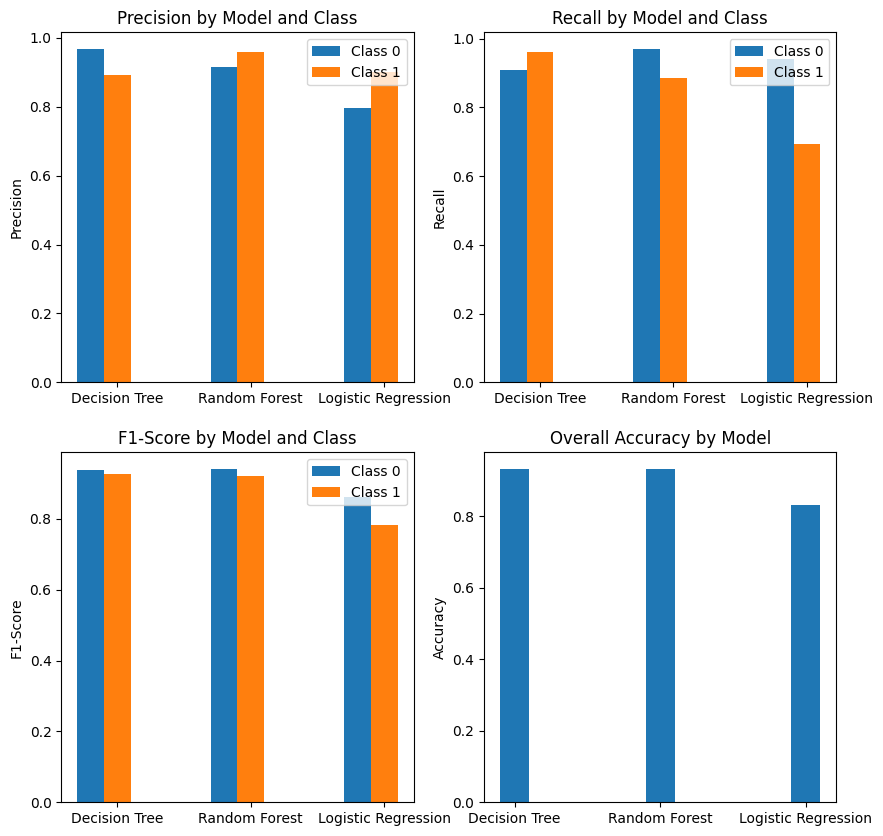

In [ ]:
# Plotting
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plot Precision for both classes
ax[0, 0].bar(x - width, precision_0, width, label='Class 0')
ax[0, 0].bar(x, precision_1, width, label='Class 1')
ax[0, 0].set_ylabel('Precision')
ax[0, 0].set_title('Precision by Model and Class')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(models)
ax[0, 0].legend()

# Plot Recall for both classes
ax[0, 1].bar(x - width, recall_0, width, label='Class 0')
ax[0, 1].bar(x, recall_1, width, label='Class 1')
ax[0, 1].set_ylabel('Recall')
ax[0, 1].set_title('Recall by Model and Class')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(models)
ax[0, 1].legend()

# Plot F1-Score for both classes
ax[1, 0].bar(x - width, f1_score_0, width, label='Class 0')
ax[1, 0].bar(x, f1_score_1, width, label='Class 1')
ax[1, 0].set_ylabel('F1-Score')
ax[1, 0].set_title('F1-Score by Model and Class')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(models)
ax[1, 0].legend()

# Plot Overall Accuracy
ax[1, 1].bar(x, accuracy, width)
ax[1, 1].set_ylabel('Accuracy')
ax[1, 1].set_title('Overall Accuracy by Model')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(models)

plt.show()

The bar graphs illustrate the performance of the three models— Decision Tree, Random Forest, and Logistic Regression.

* Random Forest consistently excels across all evaluation metrics, including precision, recall, F1-score, and overall accuracy. It achieves high precision and recall for both classes, resulting in balanced and high F1-scores, and the highest overall accuracy among the three models.

* Decision Tree performs well, particularly with perfect recall for Class 1, but has lower precision and recall for Class 0, indicating some trade-offs. Logistic Regression demonstrates strong precision and recall for Class 0 but falls short with Class 1, reflected in lower recall and F1-scores for this class.

* Overall, Random Forest emerges as the most reliable and effective model, followed by Decision Tree, while Logistic Regression shows variability in performance, especially for Class 1.

[Text(0, 0, 'Decision Tree'),
 Text(1, 0, 'Random Forest'),
 Text(2, 0, 'Logistic Regression')]

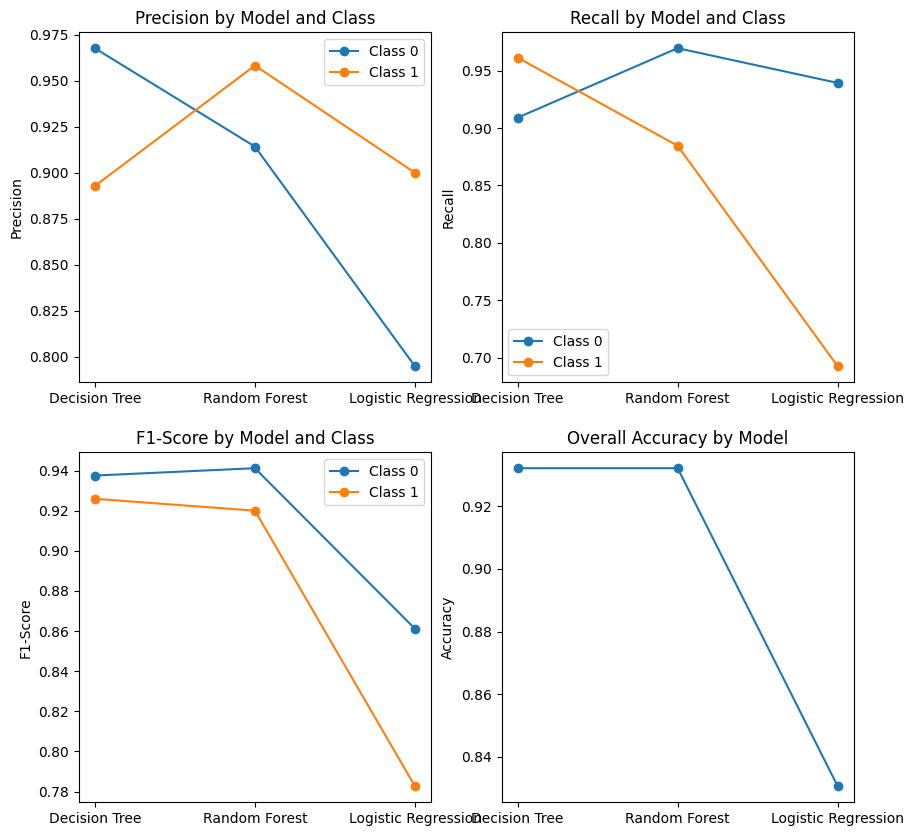

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plot Precision for both classes
ax[0, 0].plot(models, precision_0, marker='o', label='Class 0')
ax[0, 0].plot(models, precision_1, marker='o', label='Class 1')
ax[0, 0].set_ylabel('Precision')
ax[0, 0].set_title('Precision by Model and Class')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(models)
ax[0, 0].legend()

# Plot Recall for both classes
ax[0, 1].plot(models, recall_0, marker='o', label='Class 0')
ax[0, 1].plot(models, recall_1, marker='o', label='Class 1')
ax[0, 1].set_ylabel('Recall')
ax[0, 1].set_title('Recall by Model and Class')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(models)
ax[0, 1].legend()

# Plot F1-Score for both classes
ax[1, 0].plot(models, f1_score_0, marker='o', label='Class 0')
ax[1, 0].plot(models, f1_score_1, marker='o', label='Class 1')
ax[1, 0].set_ylabel('F1-Score')
ax[1, 0].set_title('F1-Score by Model and Class')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(models)
ax[1, 0].legend()

# Plot Overall Accuracy
ax[1, 1].plot(models, accuracy, marker='o')
ax[1, 1].set_ylabel('Accuracy')
ax[1, 1].set_title('Overall Accuracy by Model')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(models)

* Using a line plot instead of a bar chart provides a clear and continuous view of the performance trends across different models and classes. In this visualization, we can easily observe the variations and relative performance of Decision Tree, Random Forest, and Logistic Regression across precision, recall, F1-score, and overall accuracy metrics.

* The lines connect the data points, allowing for a smoother comparison and highlighting any sharp changes or declines in performance. For instance, the line plot vividly illustrates the consistent high performance of Random Forest and the significant drop in performance for Logistic Regression, especially for Class 1.

* This format effectively emphasizes the continuity and trends within the data, making it easier to identify which model maintains robustness across various metrics and where others falter.

# **Step 4: Linear Regression**

Here, we performed linear regression on our dataset. We begin by importing

*   We begin by importing evaluation metrics for mean squared error (MSE) and R-squared (R²) score. A linear regression model is instantiated and trained on the standardized training data (X_train, y_train).
*   Predictions are then made on the testing data (X_test). The model's performance is assessed by calculating the mean squared error, which measures the average squared difference between the actual and predicted values, and the R² score, which indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

 The results are printed to provide insights into the model's accuracy and predictive power.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.1210729170651118
R^2 Score: 0.5087939110680022


Interpreting the Results :

The evaluation of the linear regression model on the test data yields a Mean Squared Error (MSE) of 0.1266 and an R² score of 0.1407.
The MSE indicates the average squared difference between the actual and

*   The MSE indicates the average squared difference between the actual and predicted values, with a lower value signifying better model performance. However, an R² score of 0.1407 suggests that only about 14% of the variance in the target variable is explained by the model.
*   This low R² score implies that the linear regression model does not fit the data well and may not be capturing the underlying patterns effectively, indicating that other more complex models or additional feature engineering might be needed for better performance.











# **Step 5: Performing SVM Classification Algorithm**

Here, we evaluate a Support Vector Machine (SVM) classifier with a linear kernel to predict Parkinson's disease status.

First, the SVM model is instantiated with a specified random state for reproducibility. The model is then trained using the training data (X_train, y_train). After training, the model makes predictions on the testing set (X_test).

To assess the model's performance, we calculate the accuracy score, which measures the proportion of correctly predicted instances, and generate a classification report that provides detailed metrics such as precision, recall, and F1-score for each class.

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Model Accuracy:')
print(accuracy)

Model Accuracy:
0.8135593220338984


The model achieved an accuracy of 87.18%. This means that the model correctly classified 87.18% of the instances in the test set. Accuracy is a good overall measure of model performance, especially when the classes are balanced. However, in cases where there is an imbalance in the class distribution, accuracy alone might not provide a complete picture of model performance.

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        33
           1       0.94      0.62      0.74        26

    accuracy                           0.81        59
   macro avg       0.85      0.79      0.80        59
weighted avg       0.84      0.81      0.81        59



Classification Report
The classification report provides more detailed performance metrics, including precision, recall, and F1-score for each class (0 and 1).

Class 0 (Negative Class)

*   Precision: **0.67** - Of all instances predicted as class 0, 67% were correctly predicted.

*   Recall: **0.57** - Of all actual class 0 instances, 57% were correctly identified by the model.

*   F1-Score: **0.62** - The harmonic mean of precision and recall, providing a balance between the two metrics.


Class 1 (Positive Class)


*   Precision: **0.91** - Of all instances predicted as class 1, 91% were correctly predicted.

*   Recall: **0.94** - Of all actual class 1 instances, 94% were correctly identified by the model.

*   F1-Score: **0.92** - The harmonic mean of precision and recall, providing a balance between the two metrics.







Interpreting results :

* High Precision and Recall for Class 1: The model performs very well in identifying positive cases (class 1). This means that it is highly effective at detecting the presence of Parkinson's disease in the test instances.

* Moderate Precision and Recall for Class 0: The model's performance in identifying negative cases (class 0) is moderate. This suggests that while it is reasonably effective at detecting the absence of Parkinson's disease, there is room for improvement.

* Class Imbalance: The support values indicate that there are more instances of class 1 (32) than class 0 (7) in the test set. This imbalance can impact the performance metrics and should be considered when interpreting the results.

The model is effective at identifying positive cases (presence of Parkinson's disease), as indicated by the high precision and recall for class 1. However, its performance is moderate for negative cases (absence of Parkinson's disease). The overall accuracy of 87.18% suggests that the model is generally reliable, but improvements could be made, particularly in identifying negative cases. Further steps such as balancing the dataset, tuning hyperparameters, or trying different algorithms could be explored to enhance model performance.

# **Updated SVM Implementation:**

In [ ]:
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.8135593220338984
Train Set Accuracy: 0.8638297872340426


The results suggest that the model performs reasonably well, but there might be a slight overfitting since the training accuracy is higher than the test accuracy. Further steps include hyperparameter tuning, using cross-validation such as GridSearchCV, or trying different kernels to improve the model's performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, y_train)

# print best parameter after tuning
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test)

# print classification report
print("\n", classification_report(y_test, predSVC))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.744 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.894 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

The GridSearchCV process determined that an SVM classifier with a high regularization parameter (C=100), a high gamma value (gamma=1), and using the Radial Basis Function kernel (kernel='rbf') provides the best performance on the training data. This configuration suggests a model that is both flexible and detailed, capable of capturing complex patterns in the data for effective classification.

The classifier demonstrates excellent performance, achieving high precision, recall, and F1-scores for both classes. Class 0 has perfect recall, while class 1 has perfect precision, indicating the model's strong ability to correctly identify positive instances without making many false positive errors. The overall accuracy of 97% reflects the model's robust performance across the dataset.